In [1]:
using DrWatson
@quickactivate "BNP2"
using Turing, BSON
using StatsPlots: StatsPlots
const splot = StatsPlots.plot
using Revise, BNP2

┌ Info: Precompiling BNP2 [11504357-4fe5-5405-981c-8cd43ea31635]
└ @ Base loading.jl:1273


In [2]:
args = (
    dt          = 0.1,
    n_trajs     = 10,
    is_noisyobs = false,
    σ           = 0.1,
    alg         = NUTS(100, 0.65),
    n_samples   = 200,
)

;

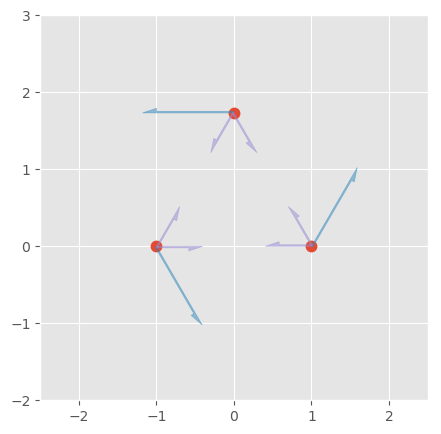

HTML{String}("<video width=\"500\" height=\"500\" controls autoplay loop>\n  <source type=\"video/mp4\" src=\"data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAA9421kYXQAAAKhBgX//53cRem9\n5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENv\ncHlsZWZ0IDIwMDMtMjAxNyAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9w\ndGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1o\nZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2\nIGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0\nX3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE2IGxvb2thaGVhZF90aHJlYWRz\nPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9j\nb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0\nPTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWlu\ndD0yNTAga2V5aW50X21pbj0yMCBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2Fo\nZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9\nNjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAACqBliIQAN//+9vD+BTY7mNCX\nEc3onTMfvxW4ujQ3vc4AAAMAAAMADuPlocG+vHIc0AAAWwAGWbfzhEj8xQEA3Pb/v95Fxto07V/I\nWQOh26ujrV8O6+MugcEpCsPPQPNSRO17ZaKxBe1QvQ9ODo0qwaAMv0MGg7yK7acoO59SQ63DyFLy\n7R0lYFNyAzWS+P0WXuuBY0uTlLHZDBqRzxTupbGelEU/IzySty7yiWMA6bIG+igqjfgp0O45nXMc\nojPppo/YZqHCBqJTGSZo69ebsvW3gd8wLVqydhT15wKTAv4AAAMANkULUcv2JFsQOc8HieWNmnYu\nB5VsilhQ//LslJd4Sd0ZMrENE6vzThcqJXti2S9OYgNdnFTD9BVK8x8vpHwJ3X4rHL1ST3/ovE6i\nb2EMn028pDLHqKsEBF3qiyp3Ky+HO0hLI08qnIOMhjxKzXOMylSgPTLhD6yGhI3ov9Qit/g754vE\nBGqtwYvcwQ/3kMMJ4KKGVcATyvKBD+aKf7b/e7QmSxrPfJfeuUAAAAMAAZmIA5PZPd1baXJ7vudX\n+ALQz65sSjJ5FY3lZXdrfVReB/gAp3YGL0FB3JqT77Nl0lJSbNrySGuo5fXjEP0h+VCsDzzgF0xE\nNoW0JkMKx/pdctgvWroW9a2pwilP6bUy1PNSCa6d02pu/AUoaOSVHc0VagVcTdzmlbnSUEe3QpfS\n2rUUR/9gR9vgh0YRBGOJMjJ5xofzUqS6WaOmgRXPcnaEwWVPFcypNF7MxnaJARsxnBmaGeMEWWSE\nB3syT5H5W7+7a9iYrZzHdrhk7l9Z81xdbrDFuerRuWBXKf39Ob+7/cG6hm/QpR/ZQeU7qonPiSP7\nyxP/aOAAA/CJsDzzdIPYAAC+ka2L80gw8kNP+Tvn78cOvuHS5KpW1HSxLzetEPGlAs/U2dPKHdbv\nMSS60SRAc+orhU7PmvkK093CvBVFLPXFh8wg/rtJWYoABACPCjuSRMG9MOCO2jp0ZKR/PAWpUNXf\n7d5OJtBdJVHoAjaBhO+ONYbywesKOuZqRK3VWcOU0oWynY/iqAuxi7bDOYoQkX0K/+DyGO9CstJ3\ndoNpdCUairj15cllRk8cWZsZ+vNk2wgrgkeDIg492Pq4wzUS67wcezUmvIsxGWBZZ3TLKDfa2oyq\nQtBlhIogal6kgmYc5aw2Nnb/SXRYh+zQzMpboa51EVC2MmMP1ZawxtyZh+WsAABRkVNgjMmJuvAA\nAEAYOuXX6gMZwmgeHEemuRd6XUIbAE+dgsQsNF2AkTM7QOdI3nO88sQwbK6ErkQU3COYlEyKpsWI\n7RUH+ZeHiFSd+5oxVDVB0jZrdFZSmdAOPgsB4M1gxInl5C06zZstW75kNhhEXfMwwfjrnnMMvFZO\npmkSv+Vhvogk+Buh5Fz6j7FYvqmCIkL4qmInOAz3MY+UrWXfFhmpOn3c97miMdJjCiFJ0SB3M5b0\nOzki3JWnwUzCQT1lzuwFcv2nt4D9v1l+X1cIUd/t81E1JzwJtJZcG0FFQzv4phS5l3GmM94a+oSr\nt4ucV+24nSX7Bp9Kj0zB2OsOTF5hUwmx1fLFYXvC17fVxXz/GXvWpfIE5YbKwmgVAqY0IlEIVWIQ\nBG8ojCMEuFsllYnD3KkVqsMnkZ8MI74+/r9olkC56cUUnKzKtJXWl0HpqFuzdGpD5/9bauvF2ShA\nbmL355XdCgYv8hxJ+OmpaeDXF9B9RVNj9j5uaGhy06EN/zlLN6jOcd7CUFNMHHP/sRLyZe+4x4xA\nnvbfeb6kOfg3HxWl2VuuIyLv704LXwwyGZQODBvvNyZeAA5t08fL5/XqQg55fpXdKK3rQ/OCCFNt\n9OQFqTqsCzDePFYZ5/jkgAABWlWv6f2cKwCZDrEKKSFJlzUcey/SKBrBAUOOkl/9V5M8pMyCKYt5\nN0Xpj5pJYy+oNLRX235PG22hkAxtgjG8Bc0FDKZedkdAlcunNq56re1VAG4JhbNOcavScG7rhyTj\nFuWscVAstrV/41faeCK+dGirpldAOZyxFEzA3jnObaP8MyBYa+4pJ591c/bq+RvLk/5QfjyBXDic\n0db+zuXTN89x9krwCXeawNkFvCDIkKyvrV9UUAPVV+rMf6u0BnIk+kTGiMbnfKV4HfLJqxJ6damA\nBc52E9IMsaD5E6JqLOt1yO7Uuy5mrF8x78AOVtCijVooFTzScZvOltppJQb2AGhPN0QBwfg73mRT\nXzhvin0wl18b0BbjQY4ufdPDgTeBHpS2X6vBUxk5Zc4BbmXwzrIxzpjjHDlUzTO2PyQbLRid7xW1\n6sA8LvK3TOkonUsDgopSu4slPFb+O6e7Rex5DTR5gFJUHdQP4Cb/IS2rEI1HTbQMxm25Z9N42pC/\nmtbH2jSetmgmdTGlPAjZQddGTcqqX70yiJTYVB6n+kC9SNxerIWRIf154syAHyqd+7Zm3ml0K3Ws\nOytXOtmzhsikaNZ+oqqkvHVMVb7z2E0Sb5UhCFd2t9w7pwXGDbqvcIlUiWk4V9fu679eiIe21d5E\nKyHf2ADQlVFs5bPq55jSy6Tq5J1GY3md3wZrv0px8oaorWLvT1a47o/ZHcDLPJhLcP8qPdNTCkem\n5DmtHAQ8SMFJC0wiIDrqi9CMSTtPxus/bzymPs8S3CdP2yzRCuTiK879bSrKDazOE0mxacC71oa9\n7n4YSZ8FfH6iUG3EwJoGMoGWyPoD/biuVwNLI1Kc91n7dV85D/VUzAzq4Y9GX1gdI0cMYTGHwwQ4\n3UV/gES7m0TNA7BL829WaEPPe1lHzbJ8kOmuh7UCMriz5B

┌ Info: 
│   positionof(space) = [-1.0, 0.0, 1.0, 0.0, 0.0, 1.7320508075688772]
│   velocityof(space) = [0.5000000000000001, -0.8660254037844386, 0.5000000000000001, 0.8660254037844386, -1.0, 1.2246467991473532e-16]
│   stateof(space) = [-1.0 0.5000000000000001; 0.0 -0.8660254037844386; 1.0 0.5000000000000001; 0.0 0.8660254037844386; 0.0 -1.0; 1.7320508075688772 1.2246467991473532e-16]
│   accelerationof(space) = [1.25143125, 0.7225141690598099, -1.25143125, 0.7225141690598099, 0.0, -1.4450283381196198]
│   first(states) = [-1.0, 0.0, 1.0, 0.0, 0.0, 1.7320508075688772, 0.5000000000000001, -0.8660254037844386, 0.5000000000000001, 0.8660254037844386, -1.0, 1.2246467991473532e-16]
└ @ Main In[3]:35


In [3]:
data =
let ms = fill(5e10, 3),
    qs = [[-1,  0],[ 1,  0], [ 0, √3]],
    ps = [
        [cos(π/3), -sin(π/3)], 
        [cos(π/3),  sin(π/3)], 
        [cos(π/1),  sin(π/1)]
    ],
    dt = args.dt, T = 50
    
    objs = Particle.(ms, qs, ps)
    
    fig, ax = figure(figsize=(5, 5))
    ax.set_xlim([-2.5, 2.5])
    ax.set_ylim([-2.0, 3.0])
    plot!(ax, objs[1]; do_plotvelocity=true)
    plot_force!(ax, objs[1], forceof(objs[1], objs[2]))
    plot_force!(ax, objs[1], forceof(objs[1], objs[3]))
    plot!(ax, objs[2]; do_plotvelocity=true)
    plot_force!(ax, objs[2], forceof(objs[2], objs[1]))
    plot_force!(ax, objs[2], forceof(objs[2], objs[3]))
    plot!(ax, objs[3]; do_plotvelocity=true)
    plot_force!(ax, objs[3], forceof(objs[3], objs[1]))
    plot_force!(ax, objs[3], forceof(objs[3], objs[2]))
    fig |> display
   
    space = Space(objs)
    
    traj = simulate(space, DiffEqSimulator(args.dt), T)
    HTML(animof(positionof.([space, traj...])).to_html5_video()) |> display
    
    traj = [space, traj[1:T]...]
    states = vec.(stateof.(traj))
    args.is_noisyobs && (states = add_gaussiannoise(states, args.σ))
    @info "" positionof(space) velocityof(space) stateof(space) accelerationof(space) first(states)
    (objs0=objs, traj=traj, states=states)
end

;

In [4]:
using ProgressMeter, Flux, Zygote, MLToolkit.DistributionsX, WeightsAndBiasLogger
using Flux: Optimise

┌ Info: CUDAdrv.jl failed to initialize, GPU functionality unavailable (set JULIA_CUDA_SILENT or JULIA_CUDA_VERBOSE to silence or expand this message)
└ @ CUDAdrv /Users/kai/.julia/packages/CUDAdrv/b1mvw/src/CUDAdrv.jl:67


In [5]:
function sim_traj(ms, qs, ps, dt, T)
    objs = Particle.(ms, qs, ps)
    env = Space(objs)
    traj = simulate(env, DiffEqSimulator(dt), T)
    return [env, traj...]
end

data = 
let ms = fill(5e10, 3),
    qs = [[-1,  0],[ 1,  0], [ 0, √3]],
    ps = [
        [cos(π/3), -sin(π/3)], 
        [cos(π/3),  sin(π/3)], 
        [cos(π/1),  sin(π/1)]
    ],
    dt = args.dt, T = 50, n_directions = 5, n_initials = 10
    
    trajs = []
    for i in 1:n_directions
        dp = randn(2)
        traj = sim_traj(ms, qs, ps .+ [dp], dt, T)
        push!(trajs, traj)
    end
    for i in 1:n_initials
        dq, dp = randn(2), randn(2)
        traj = sim_traj(ms, qs .+ [dq], ps .+ [dp], dt, T)
        push!(trajs, traj)
    end
    states_list = []
    for traj in trajs
        push!(states_list, vec.(stateof.(traj)))
    end
    (states_list=states_list, trajs=trajs)
end

for traj in data.trajs[1:1]
    HTML(animof(traj).to_html5_video()) |> display
end

;

HTML{String}("<video width=\"500\" height=\"500\" controls autoplay loop>\n  <source type=\"video/mp4\" src=\"data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAADalG1kYXQAAAKhBgX//53cRem9\n5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENv\ncHlsZWZ0IDIwMDMtMjAxNyAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9w\ndGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1o\nZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2\nIGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0\nX3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE2IGxvb2thaGVhZF90aHJlYWRz\nPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9j\nb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0\nPTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWlu\ndD0yNTAga2V5aW50X21pbj0yMCBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2Fo\nZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9\nNjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAACVBliIQAK//+9nN8CmtHM5Uu\nBXb3bOhpDEo4XuVLli4IAAADAAADACw9N9CeQeXLdMAAAO0AE/Nzi2YfoBORW8DaLu7r5HmeeCW7\ng2/To8++vti0DkkdcOoCDII1NQPEenFCaMoDzXdw0VdVH9HdKWC0joUKWVIAupkmeomtDLW0DuPo\nyRJz+XVEvw45hyc86q6ZA3+jw5YBe50uFSztSbxH3GqP+xDjHbarqX055d9xzAx8uvDIa5/0V62+\nAFkEOEkNsL02/EJVizHqk4lMflGU1IJnpETnBlNWsaDx8+5zMNPGBCfG9S7TB1agbA+Hbru4iP/g\n0fClsW8GF6+HiDn4YMW7EfWjW6qX4SUKJVyE6lB6mHNW6/Ar6Z3MQuK3isuUsPagIZc1IO2IPlbz\ntkq0DQ8wnC4kdu6fc8+l4VhPa9TiCiEkH+AddOCr8vcPRll5ynVrMOzhXSNR79S/65rSirp9lK7v\nPZXTD7IZlL90XzHPORO+OfcqGN5kadN2Zb4+gKCc253E15QRofmvvo6AZIO3Xxu5lqpCdRXMDMhH\nErxGerYFR0zyVfpiIRtwQ4lO87PD7jXEMHbI7YvV5ehByQHPuquP2v+ce7834TC972cYlyprUFmV\n139+/BoRt52eFBE3f1Xz+104PTYuMJB8i/0BJEl6DJjC712Hi82ntCorzVRjX7XEqPhRU8k5JfA6\nibW/Ujtjp2QNbTgekxg1GgOIy/wyDt/3TMdr7487J1zL1R21tJ87XATKsx63k6+uhvknbxlkAIaw\nt1GssJ5CsAvWkvZMe5AklYw3KDAkQ22hxavU7uYWBl+o0VxbDpuuYR7RDn6kpy4xLPmm51onu9mp\njNDD2VgI2f5OgX6SShT5cV+zJRIasR4ks5YCgRE0LsS86bMyU+8RF4RACG2KhvFA0HzbbJhctWI+\ncy9C7Ci2Cipfy0r3OaeMERHw96sToXk1mTGRJTr1a1R9qtGOiTwHrg8bFsErC8paxZiMJpdyGRJZ\nsz+bYx0hg+YrXKfbRvWtX+PJOcWfx7C9YdbLO9Ybe8E7FrlTRGxLYVpv86Lpewrx7C0TpuR6BiyX\nIFZeF1dwIgOGjPp8N0vXiFbqERjwSxjf9p5IwCkwAYlKULtpFjPImDtMFUat7PcZQZpqm2AAonyr\nSPcCcEoAR87uPW9pD9SC/KlugEgeISSW/QqTLLSHe66Z8/Y4AFgP5PNSFEDiam7+F6jcX99PshGO\n75yblLyCW839CfoyucOMgC1bAWchDrakkn/HJzdbGYJtYRA7BSy940hG6HhgIeYhDVIZbHZSkiXx\nW4D/oGqrOq/mXnACs7asvUpOO/9gpil/nhsiEmkOcQuFlJfdlzPuaUQkA5alnAAxOhyZn2ZBquJ4\n+bUh1OCDxA7SnKczjF1sh1wOKUC48mgID22tzsN5ZbymFqjLt9TIj+g9JzmEmSyqu1Md5UTGM4Xj\n8fdWz2C7bVhJbEU/IL4ydae0pYkSO9OXdvwNVAnf4N1zBROUmcub3fd9PN0VmhyLGOAIb715PFxC\nadTbuT2Fgb9Do6t/n7Ixvejxm6OGSJGflqFo9cqS3UYWNdalCvfzHdTdf47+atkftP2yQvOp8k1F\nX+Fsfdtw/cWzkQtyY0V/NdhVy0Oo6zUgbN6xcS+Wq8cAepiANoUXRIKoKIGLiZEavAuUeCTXnc7y\ne8qvZmPOSPgT7VcK6c0FZCsURMDIF/3VVh4jfeUiadxWaXpuxAkGv7A2ltwhGbXG884g4D8P6x/U\nAAXw7ETNF7zGySyloSiv1CNPOcfWtVHvzuW5wT1coiAWlkyEJ+7X6h1F14VpQl2BTyL8KpXrjAOx\ns4Q9cMhmUuYLMxp/aaJgJ9zbrOq5FO1vn4QODuUTcp5YhDrOvvC9V9k+UuWWfX9NUjfoGiyXVnKq\npL14+sxIZ83ZxFqugwo18epEAl0+DznD1pbtWBuKP8QdDCHqBeCytgaw9l4x9zbqmyG5nq6N9k7v\nxUtBJ71irjlcBSFvAqsO6NBXcX1hwXR+kkUKdfTECDL5fReg/BXGw8rN6H+anVrGs3BvNKRnXTjM\nbLw5V/Gk6isJrDxKUcXG7iqXZH+DlMVS/J0IkCWvu4HxWZXEOfsD2CcS0FYNlXv7l34VeNxaCJre\ntBiNupfnL7wj8H2jED8OdKWsmmauRPlMtuHLH2eUunJh2y86I0W06lpIZUOiJHMNstZ38azr4KOQ\ngOBdNTAzfBG+USTAABJFjpbQnCWN8Jp8rcMULJbe4Mky07Ti4aZgO9+l9OoJbae/CUNgv2pD4YKP\ntzH3WBdgCoVdoI/Cc7ZFGMG6wGkLTznpcX/yb7O4nxZBnoyjsG9cD/NEN1ejdyGcYOkdQMupKx8F\noKJCFnQHUCm6yBv3Am5WeDi5Ap/CzalpyNzqwYfEgEE0P6erH3qmLfpEy2211XwRqKk7HlKXsQC/\nOBk+P3ZnTjXEKN1oO+4Uml+bNHAkE/+1D3rFpP3G02oZHjl5OxamrtDE2rDkr6l84Wfw1R/yTapK\nucDQIOjRhtQFgNS64ozD0zaWYXK1ScU6dTVmzPrCIL+L/aNrUdA0HdeBycesNOMRzh13V1JIKh4w\nVhxXN8kQPjYR54Q4xx5hyY7myHNhiJ9Gl/pW96H+pD/nPqzWBGKJy3W/cK9IF0QR6l/zb94STBgz\nmWUhRCRb45Hx47A0Cjak8HOaKzGpmq82FV6xgmOOrqzlOxRcP1tCB1RBNucRASFaLjuCO3p/ef8w\ng1mtUf3zbMtlLkrgiS6RVVMRt0cZ3Vnw0O7nTRczTQCk+o

Assume we have $n$ bodies in the $d$-dimensional space. 
Let $D=nd$ be the total dimensionality of position variables or velocity variables.

- `states` or `s` has of shape $2D \times T$
- `states[i]` consist `[pos1, pos2, pos3, vel1, vel2, vel3]` where `pos` or `vel` has a shape of $d$
- `q` and `p` are postions and velocities for all bodies respectively
  - `q` and `p` both has a shape of $D \times T$
  
Some definitions

- `attritbue[t] = [pos, vel, mass, others...] -> not first order if attribute[t] != attribute[t-1]`
- `state[t] = [pos, vel] -> first order Markovian`
- `visible_state[t] = [pos_sub, pos_vel] `

In [6]:
# TODO: make this variational to account uncertainty in integration
function leapfrog(state, F, dt)
    dim = div(size(state, 1), 2)
    q, p = state[1:dim,:], state[dim+1:end,:]
    p = p + dt / 2 * F(vcat(q, p))
    q = q + dt * p
    p = p + dt / 2 * F(vcat(q, p))
    return vcat(q, p)
end

function l2regof(nn)
    ps = Flux.params(nn)
    neg_l2regs = map(ps) do p
        sum(logpdf(Normal([0f0], [1f0]), p))
    end
    return -sum(neg_l2regs)
end

function get_lossof(states, dt)
    states = Matrix{Float32}(hcat(states...))
    s  = states[:,1:end-1]
    s′ = states[:,2:end]
    σ = 1f-1
    function lossof(F)
        ŝ = leapfrog(s, F, dt)
        lps = logpdf(Normal(ŝ, fill(σ, size(ŝ))), s′)
        lp = mean(sum(lps; dims=1)) # sum over state and avgerage over time
        return -lp + 1f-3 * l2regof(F)
    end
    return lossof
end

Zygote.refresh()

lossof = get_lossof(first(data.states_list), Float32(args.dt))

F = Chain(
    Dense(12, 50, relu), # 2 * 2 * 3 = 12
    Dense(50, 6)
) # (state_{t-1}, state_t) -> (force_t)

lossof(F) |> display
@code_warntype lossof(F)

;

6.590169f0

Variables
  #self#::var"#lossof#5"{Float32,Array{Float32,2},Array{Float32,2},Float32}
  F::Chain{Tuple{Dense{typeof(relu),Array{Float32,2},Array{Float32,1}},Dense{typeof(identity),Array{Float32,2},Array{Float32,1}}}}
  ŝ::Array{Float32,2}
  lps::Array{Float32,2}
  lp::Float32

Body::Any
1 ─ %1  = Core.getfield(#self#, :s)::Array{Float32,2}
│   %2  = Core.getfield(#self#, :dt)::Float32
│         (ŝ = Main.leapfrog(%1, F, %2))
│   %4  = ŝ::Array{Float32,2}
│   %5  = Core.getfield(#self#, :σ)::Float32
│   %6  = Main.size(ŝ)::Tuple{Int64,Int64}
│   %7  = Main.fill(%5, %6)::Array{Float32,2}
│   %8  = Main.Normal(%4, %7)::BroadcastedNormalStd{Float32,Array{Float32,2},Array{Float32,2}}
│   %9  = Core.getfield(#self#, :s′)::Array{Float32,2}
│         (lps = Main.logpdf(%8, %9))
│   %11 = (:dims,)::Core.Compiler.Const((:dims,), false)
│   %12 = Core.apply_type(Core.NamedTuple, %11)::Core.Compiler.Const(NamedTuple{(:dims,),T} where T<:Tuple, false)
│   %13 = Core.tuple(1)::Core.Compiler.Const((1

In [7]:
logger = WBLogger(; project=projectname(), notes="")
config!(logger, args)

Loading chipmunk for Darwin (64bit) [/Users/kai/miniconda3/envs/ml/lib/python3.7/site-packages/pymunk/libchipmunk.dylib]


wandb: Tracking run with wandb version 0.8.27
wandb: Wandb version 0.8.29 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Run data is saved locally in wandb/run-20200306_215452-4bo9bvsf
wandb: Syncing run pretty-silence-40
wandb: ⭐️ View project at https://app.wandb.ai/xukai92/BNP2
wandb: 🚀 View run at https://app.wandb.ai/xukai92/BNP2/runs/4bo9bvsf
wandb: Run `wandb off` to turn off syncing.



In [12]:
let n_iters = 1_000, opt = Optimise.ADAM(5f-4), ps = Flux.params(F)
    with(logger) do
        @showprogress for iter in 1:n_iters
            for states in data.states_list[2:end]
                lossof = get_lossof(states, Float32(args.dt))
                local loss
                gs = gradient(ps) do
                    loss = lossof(F)
                end
                @info "train" loss=loss
                Optimise.update!(opt, ps, gs)
            end
        end
    end
    F
end

;

Progress: 100%|█████████████████████████████████████████| Time: 0:00:34


In [14]:
let traj_true = data.trajs[1], state = vec(stateof(first(traj_true))), F = F, T = 50, dim = div(size(state, 1), 2), dt = args.dt
    envfrom(state) = Space(Particle.(fill(5e10, 3), state[1:dim], state[dim+1:end]))
    traj = [envfrom(state)]
    for t in 1:2T
        state = leapfrog(state, F, dt)
        push!(traj, envfrom(state))
    end
    HTML(animof([traj...]).to_html5_video()) |> display
    HTML(animof([Space([objectsof(traj[t])..., objectsof(traj_true[t])...]) for t in 1:T+1]).to_html5_video()) |> display
end

;

HTML{String}("<video width=\"500\" height=\"500\" controls autoplay loop>\n  <source type=\"video/mp4\" src=\"data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAGWyG1kYXQAAAKhBgX//53cRem9\n5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENv\ncHlsZWZ0IDIwMDMtMjAxNyAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9w\ndGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1o\nZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2\nIGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0\nX3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE2IGxvb2thaGVhZF90aHJlYWRz\nPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9j\nb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0\nPTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWlu\ndD0yNTAga2V5aW50X21pbj0yMCBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2Fo\nZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9\nNjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAACtBliIQAK//+9nN8CmtHM5Uu\nBXb3ZqPl0JLl+xBg+tAAAAMAADyIVtkE7/NEmD0TkAAAKaADUM5xbLKQBHFK63PqHX8E6+iWqIqW\nv1Y/0237N6fSR715qNj25TptRGGN+1/Jebfz45sQfamdTklFpIA1Mxb+nW2yYk/LbziERuKvNbbQ\nD73bBATKcEJHgas3ZSp8Ld0BzfALxyJlAE5BLqgX8uG1aEWcLeAiM3H0ceI09HdshKNNSQd4SrGm\nmIlwKDAAAAMAvssQs5S6h0fbcTcQMWNwto6FNQsWJ7GhRhULEi2JXiCDQio1Oubykm+DynnAKLEh\nZmRWvSZFfGsfnE3eKr6DAWs73rg+CydYQGnLF7HTNQpK639PE2kvI8Caf67sLhy6jivftZvh2OsE\nqvoXx7ygNEUsW+lTkAdVMBUbGpTCjSSFQOVPJWA3i2bl97n4xo0L332VW4wjHaXdQaacDqlwDTBD\nDtPzHeVOk7sv9XDEe4dn01tASrocPQsOLtfb1ovS+EztyfQvVqcAehbgq1z5F2W6HfBGvxQT+SaU\nFaX33bkRrRGcH4bSbXJqYz3NjjoKcC2xALeUljUJFRmuoO7DjPsk/HnDkSAWpyYwAn/KDHTOY+Rc\nTez6e/ICiDWMolv98OjAGZNcKdOk3GOnEuUxjjKvlrOHWKPlsZ5WTBj+TEp5ihgobsvwfuzidyp6\nrCHVNWaXpoQVpynfvjhNoAzSOZUheC8EEmZwuSst0chIUvODUMwGHQKW6SwfVM1unG0eGEjBP6/V\nevsYGHfLaz3p9vsztjsCX/7qw3CK11ij+Jlu1bKrdZ/EFubxNgWJVmwmcuirhfN5FF03VnMn8AAq\ntX1jV4nTnG+45HZ+RCGl7xyxKQzIbmwIYMYCKwBU2wg2UYhlwXk2bnqTEdeffrEPjhSDi0G8Uu3P\nbt3RFbiSUykeFgBn3Ri5xdAxT0AzE+q5WZ1yNIn//hflhvURDN2//iINmp4PdN+5ZCGPf/ZbbC2l\nj5GxTW1Un1P0304dCy5di0Qxyj/Ow5HcQwi6gbuI/cfFZSIfzGpucO6xQZkCtlMzKwR09jr+uZEM\nPoKSYQmQrEkNpVN77oGwfMiyD+sK4dn54XNcP8q0LWNty6D7vwXW+uLTzVXlbprXjINVCsGswJjF\nn4dqfCjAYoc8SVw3kkaS6NOF04G5vMvOrbzl7212LFLYk/FdeCy8BLzF9jTwktRC772BPLKOWaJm\nv0jEs/8ClS22vH723I90hshV4AZkNSKDros2NC1lZQuOJWAskcXBpRPpyft3WXz0hwjtSa3ad9p2\ngtUgnBOruIzQ9CC9EfUurV7aS/UC+pQeQJxfED5aZPce6qPgBjgOkgz85DtAJdEAi+6ZFqKBX5ly\nUsYvnXClEqgcy1ARSCzkg1v/YqCeDZyhR8v9+ZdB6IbP53M+bCrtwqbGvipk2/0hw4WMeq27hH/u\ndP3QghoPbYuw9nrqhuADT2ljMkUPLIYYeQTgFkfjBk99yYcX8grl+eZF6SaJNyE4pYxF4hlJtX8A\nUC1PJ7s0+pq3Mk6DzF2bZFxCUYcsWCCbYuSafYBI6NiOkhy6kcpHSMgxhoCsAWnnHwSO0WSknn8G\ntFZvYNL6fHYjqZZNcGAWoAIYFhvPM/TjGYKy0Zpxp51rv7c1p9uIPpRHN4gtwsVOwOqauIPRSkC2\ndNco0ICNAfVHRKLfEQ4N1hB5ptMgwwKmdXSdYNMPM4AAJGUEOJzHUCrysZeeIA9aq8dwEb0kjSop\nCD19bOMem4vPOad39tdDgvlI4c+x4BrlmgttYF+Z3vaEfHv0emmqanpsLHW0yns1ba4PuXOTAtDQ\n85R76dfdkmUzvwposIR3mFR3qsjhYQ2USxImqouze3KOTfGUplj5JeCbPSt5sK70WulGt3YtRh6h\nz4JIjpF4QIaEpPXB3A1An4GYXHYr6qldP19yfgqDiD115/drDtmoOiJol0JfE7AwZNmuPKNYNDNv\nHYYk3J6IZty7K5W5qaaOwxGJ/4noqqhmLPbJ8h7gUeA+v02OeqW1mZMfOg/TNEUyEsgrpaoBm/f/\nhetaFXLtZuW56yFLorUQ/ERI2TP9AGQWQAwftg5sv+ioAokeIFTbwG+Ggkutd5VeUznq9egmZij2\nd6XgpZ2GtUcC812eyIjAKjXoBsJAwupKV8K4z4A5ZlD3wscO9m2vAWcxgim3qUzcnBXga/QJ0vVI\nohyUoUtpE4+tla6UCjnKIeC96IV1jpz3X6WQammN1pbRE7Tw4D/osAjYoMlPU2eTVEXQjdrwUWpb\np+sbC3Q3eVzzoysBCWKKSGJUlO1bq4KB4Xxd5qwbvG5GcyPpcuhza6Z90HAAJvuEYBmiBLizaLGl\n3ysyMromiC+mlaGDgzPgtIzVlyK4Tj96s+yZ+91J9AdMl7uUHxAqMMUMZ80AITOffuSkmsHigL6p\nXuSu6Gq8WoQWj3x84wtNzWdmNeQAXoWv2Vil5jvfgepTD5EEeccXuzvW2bECOOb6eqUtC9rz4o8Z\nqV5jcPBif9IKef4a0QJ2bEBdPtbPDggVebGnBuFeXQhoUODua3f8gNzqFYBWFE3iS1kpN/fNiAWX\nQdsPxRoEzwqkAJOHXWVtDD+56EtOR815uWmLvQkNgr5NY6Ve8YDhHWTGouKuy8AUrh4Dd4+nAOat\nF7EFj1RnZ+zsStfSTPBW8P1k9Cy1bJ33sf8JsgCGbACs4uE/YpXvFdNhHBzuvuERmVhZZ1T8Qxau\n6pLRGWJ2Tx7rQ5kIPi3KKYWt8nHOXPZR2pdgWl16lzuHhU

HTML{String}("<video width=\"500\" height=\"500\" controls autoplay loop>\n  <source type=\"video/mp4\" src=\"data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAC6C21kYXQAAAKhBgX//53cRem9\n5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENv\ncHlsZWZ0IDIwMDMtMjAxNyAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9w\ndGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1o\nZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2\nIGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0\nX3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE2IGxvb2thaGVhZF90aHJlYWRz\nPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9j\nb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0\nPTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWlu\ndD0yNTAga2V5aW50X21pbj0yMCBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2Fo\nZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9\nNjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAACD5liIQAM//+9uy+BTX9n9CX\nESzF2kpwPiqkgIB3NMAAAAMAAAMAJOccxEpfbYdmAAADAUQAGoa/yxEj8wMNpO3GIoKwtmlWGZOV\n1fzPpqM49InKIa9dB9X65HiS5nnjP1gZVy4tewqVsel20BYcGPzfL02LqoyCOCZPq0s4O35DE/ww\nbXaKzi9T41Veov/EPD5rBeJPSZzY0qDwiacmkUKoeFlZ1sekL3lr48PF79814FytIsHUwJkHEa3A\nDxLxcEtxx+XWmEH/TFKulccycXyvLBrKpLCWX13QKauigB8jtJtyXA6YgUHNqLqtaJPRaWc0EkTw\nKezSAVwPDmRHjVpHX/xYmymWx/vCL2NUilxOMnEaOuzzOWi+yP1Iv1wmnvM9iGLR+CspFtL/5rWd\nQohp5rME3R/iiXvIgrTDS2mlKJd3y2aOzmqAoQvGLnfod6BTmbKVa4mn40EDWk29dQETIOpAVs8r\ntuo9EfteLl52N7isPb4d9QG1j8AL4/1BW9rYvekR1wEkpTUguG1Ea5Jj6nuaABc5LETiMQwEWBWv\ne8kdIM8TOLt14jjybumqITdX/HhPQi15hMmk5LDAgGE3fRzRxyrFw0YwTX8gNp+VCtxLEB/7dT23\nltYah6/QKZfVGe3QDm79qaioWqnT2xeUZKN2kaXdSdeORt1x2sdATPGSNKeohthDpkaVPB36kG/F\nODUSA9b4UnX+toUt3E+cX/AdjVcaic/wdvC3nm8K3Ing7wJ5EXTWAAvNtijGFLUCgRFPpdVak1lT\n/5F74NFtQqwCKmfmY1KdwTYObJCmWE9/IcCHs5D20tiqWAb+Gy5vI5EoyyUGsLieZWr7wd81ezl1\n+QbC7dSwOGe14ppoFywyou0/b3yyhKSi3EHXkmOIqwWbW6UsXkSpMOK8R+kRPUxsEgw1DsqMf+VJ\nw7BA7vC9HheiXhvlb8IJvHqzWuZ3bdKriwWKGTI3JZsjV7rLJcX9gtngFcIjwbBfp/U9pmIXC6H+\nQ/cbLpY19rKNfR9BURso9B9N5OsHTEDAStyumuvBY1Gi9AqGGeYSZOu4fwybkwjSty28cABTmDfh\nMAA5VLhkfXDMexHRk5fiV4cX1wId0FdpcYGZU6m38WBCbNM/7ECxl5YhYwFteJxn1q2VdfG9ivml\nEzxED3GBLYbO1SAemnrpIgcJtUpZp84ygAtQ6XBrSbxT7Yr8VaYDyukScAuEbgR9qN2Yl9m2uu8o\nvGPljkMgnemwM3BnJNx+ohGBN9IFHnWPyEck9dWPxUJA642w34xgXqfWVfRN1yG19ClUHS8p/4c6\niuwe4FM7AptZjbOI+J/MNEcQjyepGJiLlOYWKrDdwObrGyf38NpgKpS0FjPT8s9dWgZlELs4w15/\nxtLVeDSvZh13+PdJZW6w4RyTilLCJafcU9j4+DvUZ1YKZ3kk2kZgemihS9TCaAeWaqTj2YxopCL0\n5zaUARv8vLm3GeemNlnAivjLNndQkEKF3UTKDfwFSIu5FbIVwiIT3jh+0b89MHPQyAwhgYfgnOOL\nbYZuFjN7i/QwQxP+zo9yI5EH/g2VV4rdvogmnj7ezPphnpaH2LqEcY3HZrhVgAzS1IJOz3394cZu\nPkiWzQkjeKQDAXkJ+zbAcE/H37okidGDUQD8PHNtmofVkIHNVAANc8dHXHeJtvG2TIhHrzjnfjxt\nnOQPi7v1g1ImrP9txEQcXJzgS+hcIgxEaLYE1vpoVMpxQP445GoUAJfOBaYFutHVvy4o10oqYUE5\nfvha1DAJR5iXYcfuP7r43BXSAAf7uVB1+XHV96N4Z4mnMqwOMuc2usYt8MuMzCkD57iH/mPU1kUJ\nlx+aaRpe9o6UfgGW5vuAVDyZ35BEq7rxHsWEYAsGM3kRZlQuKflZSGekouMfN8FYcgk9DdWqzBs0\nweAYBq8EcyWTbSdZcGCmkSzrV1iyMrSgzRlrlJuoEoczmtmUqdwQyDzh1Mi9Vx3PUVaeAEnB+un7\nV3XlZmSJZYTiXCGDxAwxbJfTRsZB1XG6wEeiuchnlqcZT/6D1EQ2qU4qwxg2qzhm5y20EFRFa7rn\nEpdXSZSrLWT1+1Oi1ZW70WmsqJ0IWoYCU0V/hloJ26N+nlnKuS0zq8LkhtPCIYX1J7Spb7yHX3db\noYBIHQpql/uvNW63XP129GT7o3EuIL11iU9GcvtGF1D8gMxuX1TqAFR5UZP9V5qL3sOrlX24G4M9\nLoxfzo5jeLRtE0aowEZNWnLm4BCkVTG8lWPx6oig4l4n2y4NAoYAciwdmI6Sb7N5QAHZ690uYlbu\n581AzdKfJd+L3vDzQUetUDzdOekk729BxoTV/dQhvpZ3MivLSStZJzEEwqVNOFc/WmN5CbMiN2rZ\nn7Z0Lfbr9Fx+P7a25ix2wpkD5f2/RgeuEbagPLYnomUzu5IvPgRx6d3CjFE9kRlvVkSUpbfywP0j\nSvYkK1I4x8lO1bXA4an4mstI+9tMzMXJXvBVzTFjDM3PCe1fn2RwIeNAm1NazLx51uzsrj09ci1n\nP0tE9Feu9GZ5jp8IUSfLk9jGvbUeYuOUBgkVf30b/sgmUjDBSVQY3ibUkIX1P0rLfbfO/9BkHzsY\n7HnojproGnxM4nRzMVdsya2fVL5aBnjEc8AW9MJbhE3FHd49JAbE5YOh10y7+SumTfMKpaqoixWq\nA+o8455kfLGgsIjirowu7kK/tFdOq7bMUSj8Sa5aga16DOVdPihdZqDvehuZmBxu2Bu8PiV6yQUi\n4kW0VPysnmTBOyPKWRLu6RSlmiE9ds63m0xHqcDosTlg+d

## MCMC

In [ ]:
@model three_body(ms, states, dt) = begin
    q ~ MvNormal(zeros(6), 10)
    p ~ MvNormal(zeros(6), 10)
    space = Space(Particle.(ms, q, p))
    for i in 1:length(states)
        space = transition(space, dt)
        states[i] ~ MvNormal(vec(stateof(space)), 1e-1)
    end
end

@time chn = sample(three_body(massof.(data.objs0), data.states, args.dt), args.alg, args.n_samples)

splot(chn; colordim=:parameter) |> display

bson(datadir("three_body-noise=$(args.σ).bson"), chn=chn)

;

let n_mc = 50, T = 100, do_mean = true, res = get(chn[end-n_mc+1:end], [:q, :p])
    Q = Matrix{Float64}(hcat(res.q...)')
    P = Matrix{Float64}(hcat(res.p...)')
    if do_mean
        Q = mean(Q; dims=2)
        P = mean(P; dims=2)
    end
    Q̂ = zeros(6, T)
    for i in 1:size(Q, 2)
        q, p = Q[:,i], P[:,i]
        space = Space(Particle.(data.ms, q, p))
        traj = simulate(space, args.dt, T)
        Q̂ = Q̂ + hcat(positionof.(traj)...)
    end
    Q̂ = Q̂ / size(Q, 2)
    HTML(animof(Q̂).to_html5_video()) |> display
end

;